In [1]:
from IPython.display import Image

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import ks_2samp
import scipy.stats as st


%matplotlib inline

## Introduction  

For my the question of this assigment is not clear: ----
What exactly larger mean? By larger I could interpret that what I want to know is which distribution has a larger expected value. 

But I also think that perhaps the question should be: Identify if both distibutions came from the population or not.

This second question, for me is the real intention of the this assigment. 
However I will perform an extensive analysis to answer both interpretations, in order to achieve it I will use the following schema to improve the readibility and organization of this notebook.
""""""""""""""""""""""""""""""""""""""""""    
Goals?
-  veure si venen de distintes populations y quantificar la diferencia.
- veure quina distro es més gran que un altre.

Distins apartats que s'han realitzat?
- First glance analisis.
- Taking a a closer look.
- Calcular mitjana/varianza i altres mesures estadistiques.
- Quantificar la diferencia (metode naive meu: overlapping, metode estadisticc internet)  
""""""""""""""""""""""""""""""""""""""""""

In [2]:
two_distributions = pd.read_csv('../data_exercise1.csv')

In [3]:
two_distributions.head()

,value,type
0,1.59000,type_1_500_samples
1,65.11050,type_1_500_samples
2,31.76025,type_1_500_samples
3,23.81025,type_1_500_samples
4,0.79500,type_1_500_samples


In [4]:
# Checking if the info is true
two_distributions['type'].value_counts()

type_2_10000_samples    10000
type_1_500_samples        500
Name: type, dtype: int64

In [5]:
samples_500 = two_distributions[two_distributions['type'] == 'type_1_500_samples'] 
samples_10000 = two_distributions[two_distributions['type'] == 'type_2_10000_samples'] 

## First glance analysis:

Text(0.5, 1.0, '500_samples')

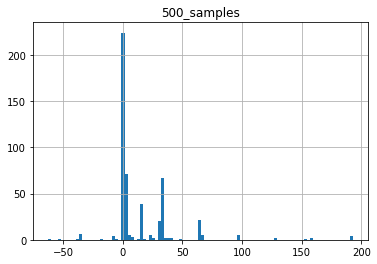

In [6]:
fig, ax = plt.subplots()
samples_500.hist(bins=100, ax=ax)
ax.set_title("500_samples")

Text(0.5, 1.0, '10000_samples')

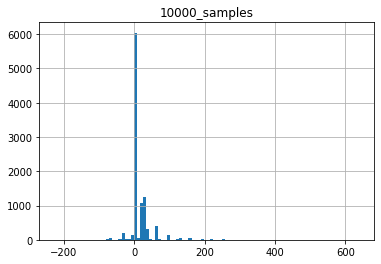

In [7]:
fig, ax = plt.subplots()
samples_10000.hist(bins=100, ax=ax)
ax.set_title("10000_samples")

At first glance, we could claim that both distributions belong to the same population. 


**For:**  
1. Both distributions have a high peak at 0.
2. Both distributions behave similar around 0. Positive values are more common than negative values and 
3. Although, distribution 2 (10000 samples) and distribution 1 (500 samples) has values from -200 to 600 and from -60 to 200. This difference can be easily explain if large values like 600 or -200 have a really low probability (probabily these values are outliers), so in a pull of only 500 samples these values are unlikely.

  
**Against:** 
1. If I look a distribution 2, the highest 1st & 2nd peaks are about 6000 and 1200 samples, in other words there is ratio of 5 (6000/1200=5). On the other hand in distribution 1, 1st & 2nd peaks are about 275 and 70 samples which implies a ratio of 4 (275/70≈4). 
2. These histograms may be misleading, because we are seeing the distributions from a broad perpespective. If we take a closer look we may found specific values that are more common in one distribution than in the other. 
  
  
**Conclusion:**  
  
Altough, at first glance both distributions look really similar, we need to be careful because the devil is in the details. So the following steps will be:
1. Take a closer look (zoom in the histogram)
2. Quantify how similar or how different both distributions are.

## Statistical analysis

But, before taking a closer look is a good practice with almost 0 effort to look at common staticts measures:
1. Mean: tell us which is the central value of a distribution.
2. Variance: knowing the central value loss meaning if the distribution has a high spread or variance.
3. Skewness: Just with the mean and variance, we can have an acceptable mental picture of the distribution, but it can be improve with skeness and kurtosis. Skeness measures the asymmetry of the distribution (gaussian distro has skeness 0 because is symmetric, our distribtuion will have skeness>0 because the right tail is longer than the left tail).
4. Kurtosis: For me this measure it is also important to quantify the presence of possible outliers. I consider the normal distribution as the dream distribution (because is symmetric, has few outliers and other cool properties). Unluckly, normal distribtuions will not appear in your daily-basis workflow. However, it call help us to intrepret data if we have a reference point --> normal distribtuion has kurtosis=3. 


In [8]:
print(f" Distribution 2 mean is: {samples_10000['value'].mean()}")
print(f" Distribution 2 variance is: {samples_10000['value'].var()}")
print(f" Distribution 2 skewness is: {samples_10000['value'].skew()}")
print(f" Distribution 2 kurtosis is: {samples_10000['value'].kurt()}")

 Distribution 2 mean is: 13.850097314999998
 Distribution 2 variance is: 1175.8347037491178
 Distribution 2 skewness is: 3.7655935884124987
 Distribution 2 kurtosis is: 33.597813571545466


In [9]:
print(f" Distribution 1 mean is: {samples_500['value'].mean()}")
print(f" Distribution 1 variance is: {samples_500['value'].var()}")
print(f" Distribution 1 skewness is: {samples_500['value'].skew()}")
print(f" Distribution 1 kurtosis is: {samples_500['value'].kurt()}")

 Distribution 1 mean is: 15.1228635
 Distribution 1 variance is: 863.8534094907241
 Distribution 1 skewness is: 2.9762400525350587
 Distribution 1 kurtosis is: 13.255000014015412


From the first glance analysis I was expecting a mean ≈ 0, however the mean is around 13 & 15. Perhaps the most common values are not around 0, so lets zoom in the histogram between 0 and 50.

Another important fact, is that variance is huge, so the mean value don't tell us exactly which is the main tendency (which it is important to business). In this case, it is important to calculate the expected value (it can be easily computed using an integration and finding the PDF using scipy), I will not computed because I think the analysis will get too extensive and knowing the expected value won't help me in quantifing if this distribution belong to the same population or not.  

Finally, skewness indicates that both has a similar asymmetry and kurtosis indicates that the outliers in distribution 1 are less frequent than in distribution 2, which it is what I was expecting because there are less samples.

Text(0.5, 1.0, 'zoomed_500_samples')

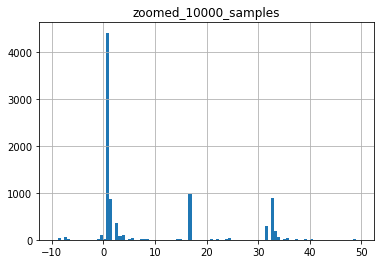

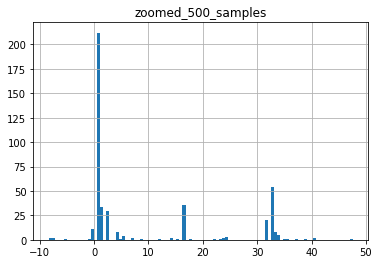

In [10]:
# Zoom-in region -10-50 samples
fig1, ax1 = plt.subplots()
zoomed_df = samples_10000.loc[(samples_10000['value'] > -10) & (samples_10000['value'] < 50)]
zoomed_df.hist(bins=100, ax=ax1)
ax1.set_title("zoomed_10000_samples")

fig2, ax2 = plt.subplots()
zoomed_df = samples_500.loc[(samples_500['value'] > -10) & (samples_500['value'] < 50)]
zoomed_df.hist(bins=100, ax=ax2)
ax2.set_title("zoomed_500_samples")

So clearly, in the first glance I intrepreted the data wrongly, because the highest bin is not at 0. Let's find out which interval is the most common in both distributions.

In [11]:
def most_common_values(df, bins=100):
    zoomed_df = df.loc[(df['value'] > -10) & (df['value'] < 50)]
    hist, bin_edges = np.histogram(zoomed_df['value'], bins=bins)
    idx_most_common = np.argmax(hist)
    return np.max(hist), (bin_edges[idx_most_common], bin_edges[idx_most_common+1])

In [12]:
max_hist, (interval_0, interval_1)  = most_common_values(samples_500)
print(f"Distribution 1 has a total of {max_hist}, between values {interval_0} and {interval_1}")

Distribution 1 has a total of 212, between values 0.5676900000000007 and 1.1278425000000016


In [13]:
max_hist, (interval_0, interval_1)  = most_common_values(samples_10000)
print(f"Distribution 2 has a total of {max_hist}, between values {interval_0} and {interval_1}")

Distribution 2 has a total of 4404, between values 0.5775590000000097 and 1.1669860000000085


So, now we know that the central tendency of both distributions is around (0.5, 1.2)

## Comparing distributions graphically.

We can graphically compare both distributions plotting an histogram as before, but we can also get a more accurate  idea plotting the probability density function (PDF) of each distribution. Indeed, both the histogram and PDF are the basically the same, because the PDF is a continuous version of a histogram (if instead of using 100 bins I use infinit bins the histogram will be equivalent to the PDF).

But, I think it's a good idea to compute the PDF for these reasons.
1. More accurate and smooth visualitzation of both distributions.
2. PDF is already normalized (y-axis between 0 and 1) so it is easier to compare
3. Once you know the PDF, you can compute the expected value of the distribution. 

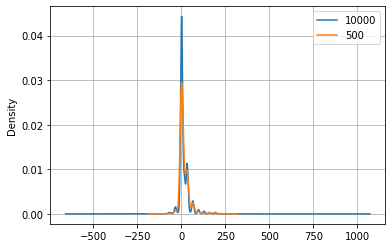

In [14]:
fig, ax = plt.subplots()
samples_10000['value'].plot.kde(ax=ax, label='10000')
samples_500['value'].plot.kde(ax=ax, label='500')
ax.grid()
ax.legend()

This plot clearly indicates that both distributions are really similar, so the last step will be to quantify how similar they are.

## Statistical analysis

### First approach

In this first approach, my objective is to quantify how similar both distributions are, in order to do so I will apply a very simple idea.  

If both distributions come from the same population, if I randomly pick 500 samples from the distribution of 10000 samples, I expect to an histogram similar to the distribution of 500 samples. So, to quantify the similarity between both distributions, I just need to compute the overlap between distribution_1 (500 samples) and the new distribution (500 random samples).  

This approach have 2 inconvenients.  
1. What happens if distribution_1 comes from the same population of distribution_2, but for some unlucky reason, it's different from distribution_2 or contains many more outliers? Then, this method will not work properly, but most statistical methods will fail too because statistics in general it is not able to extract valuable result from rare events.  

2. If you pick randomly 500 samples, your overlapping area will not be statistically meaniful, because sometimes you will get a large overlap and in other occasions you will get a small overlap.  

To get rid of this fluctuations, I will compute the average over 1000 shots.


In [15]:
def get_sample(df, size):
    return np.random.choice(df['value'], size)

def similarity_ratio(theoretical_sample, exp_sample, bins=100):
    def compute_area(sample):
        hist, bin_edges = np.histogram(sample, bins)
        return np.sum(np.diff(bin_edges)*hist)
    
    def overlap(sample_1, sample_2):
        height_1, bin_1 = np.histogram(sample_1, bins)
        
        # It's easier to compute the overlap if both histograms have the same bins
        height_2, _ = np.histogram(sample_2, bin_1)
        width = np.diff(bin_1)
        areas_1 = width * height_1
        areas_2 = width * height_2
        
        return np.sum(np.minimum(areas_1, areas_2))
    
    area = compute_area(theoretical_sample)
    overlap_area = overlap(theoretical_sample, exp_sample)

    return overlap_area/area

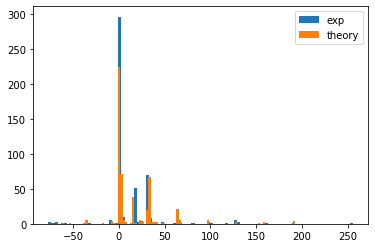

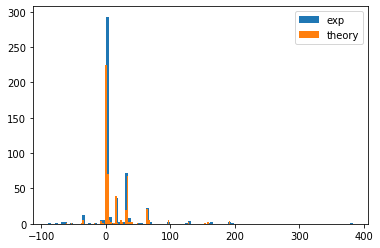

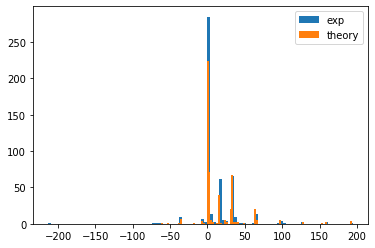

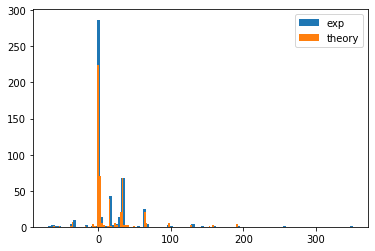

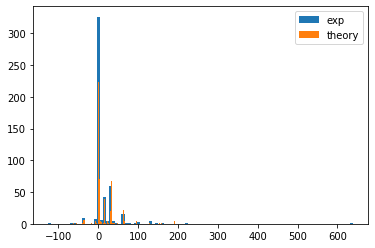

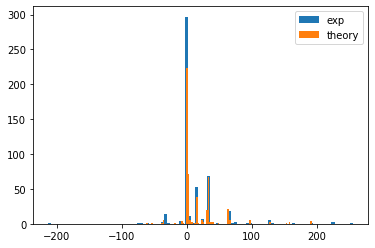

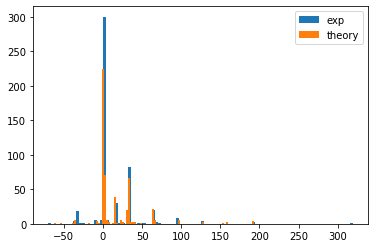

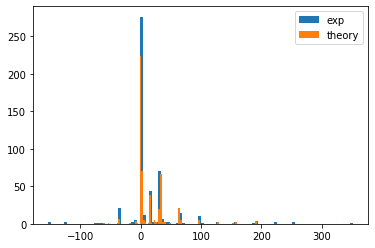

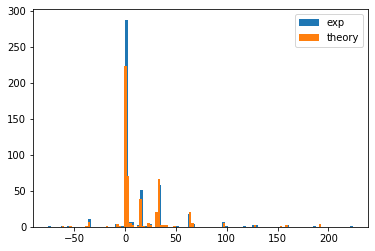

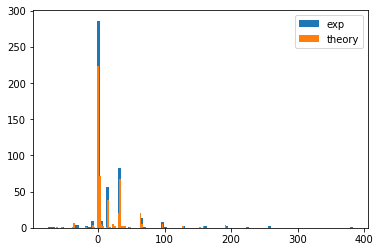

In [16]:
# Compute the average of the similarity ratio for 1000 shoots
mean = 0
shoots = 1000
for shoot in range(shoots):
    mock = get_sample(samples_10000, 500)
    s_ratio = similarity_ratio(samples_500['value'], mock, 10)
    mean += s_ratio
    if shoot%100==0:
        plt.hist(mock, bins=100, label='exp')
        plt.hist(samples_500['value'], 100,label='theory')
        plt.legend()
        plt.show()

In [17]:
print("Average similarity ratio = ", mean/shoots)

Average similarity ratio =  0.9535980000000012


As we can see both distributions are really similar up to a 95% of similarity, which it is really high.

#### Manual test

In [18]:
area_theo = (-36.86+62.4)*3+(-11.32+36.86)*7+(14.2+11.33)*309+(39.74-14.2)*138+(65.3-39.74)*24+(90.81-65.27)*5+(116.34-90.81)*5+(141.87-116.34)*2+(167.41-141.87)*3+(192.94-167.41)*4
print(area_theo)

12767.280000000002


In [19]:
#overlapping (pick lowest peak)
overlap = (-36.86+62.4)*2+(-11.32+36.86)*7+(14.2+11.33)*308+(39.74-14.2)*138+(65.3-39.74)*15+(90.81-65.27)*4+(116.34-90.81)*4+(141.87-116.34)*2+(167.41-141.87)*0+(192.94-167.41)*2

In [20]:
s_ratio = overlap/area_theo
print("s_ratio = ", s_ratio)

s_ratio =  0.9639813648639333


area_theo =  12767.062499999998
ratio =  0.964


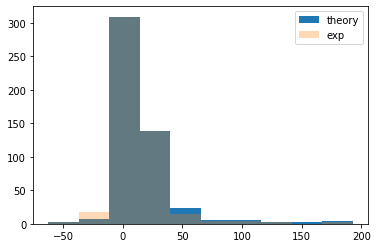

In [21]:
def compute_area(sample):
    hist, bin_edges = np.histogram(sample, 10)
    return np.sum(np.diff(bin_edges)*hist)

print("area_theo = ", compute_area(samples_500['value']))

# test
np.random.seed(3)
mock = get_sample(samples_10000, 500)
ratio = similarity_ratio(samples_500['value'], mock, 10)
print("ratio = ", ratio)


hist, bins_theo = np.histogram(samples_500['value'], bins=10)

plt.hist(samples_500['value'], bins=bins_theo, label='theory')
plt.hist(mock, bins=bins_theo, label='exp', alpha=0.3)
plt.legend()
plt.show()

Veim que el ratio i el s_ratio son pràcticament iguals, a més l'area calculada a ma coincidiex amb la que hem programat, per tant podem garantir que el codi funciona com esperavem.

### 2nd Approach

Previous, approach it is just a simple idea that I came up with to quantify the similarity. In spite of being confident that the 1st approach is a good idea, I would like to see how others statistical test perform.  

One of the most well-known method to compare if two independent samples are drawn from the same distribution is: **Kolmogorov-Smirnov test**, which it's already implemented in [scipy library](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html).

In [22]:
ks_2samp(samples_10000['value'], samples_500['value'])

Ks_2sampResult(statistic=0.042099999999999915, pvalue=0.3605076691177764)

**My null hypothesis**  
For all the evidence presented above (stastical analysis & PDF comparison) I quite confidently claim that my null hypotesis is: **both distributions are drawn from the same population**. Now, I will use Kolmogorov-Smirnov test to try to deny this hypothesis. So, my **alternative hypothesis** is that both distributions belong to a different poplulation.


**How Kolmogorov-Smirnov test works?**  
It computes the empirical cumulative distribution function (ECDF) of both samples, if both ECDF are similar, we can claim that both samples are drawn for the same population.  

To identify how similar both samples are, once the ECDF is calculated it compares the maximum distance between both ECDF (see picture 2 [reference 1](https://towardsdatascience.com/how-to-compare-two-distributions-in-practice-8c676904a285)) to identify if the distance is large enough to claim that both samples are from different populations.  



**What is ECDF?**  
It is a function that goes in the x-axis goes from -infinity to x, and in the y-axis goes from 0 to 1 (it is normalized). And what it does is to cumulate/count all values below x. Then it cumulate/count all values below x+delta. And so on, until we reach the last value. (see formula in [reference 1](https://towardsdatascience.com/how-to-compare-two-distributions-in-practice-8c676904a285) or [wikipedia](https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test), both formulas are the same but they are write down differently).

**Example:**  
My distrobution is these values $ [-5, -3, -3, -1, 0, 1, 1, 2, 3, 3, 3 ]$.  
Then, I will arbitrarly define $x=-3$ and $\Delta=2$.   
So, for $x<=-3$ I have 3 values out 11, then the cumulative value is: $ 3/11$   

If we keep going:  
For $x<=-1$, the cumulative value is: $ 4/11$   
For $x<=1$, the cumulative value is: $ 7/11$  
For $x<=3$, the cumulative value is: $ 11/11 = 1$
  
If you want to plot the ECDF write down:  
```python
plt.plot([-3, -1, 1, 3], [3/11, 4/11, 7/11, 1])
```
**references**
1. https://towardsdatascience.com/how-to-compare-two-distributions-in-practice-8c676904a285
2. https://towardsdatascience.com/kolmogorov-smirnov-test-84c92fb4158d

For me, computing just a ks-test with a p-value = 0.36, it is not enough to confirm the null hypothesis, because it doesn't have statistical meaning.  

Now, if I want something more meaniful, I could compute the average p-value over many samples. And this is exactly what I am going to do. But I will use and **important idea** from hypothesis testing: 

**If the null hypothesis is true, p-value distribution is uniformly distributed**

(Check the section: Explanation of p-value in hypothesis testing, if you need more details).

0.5590349567508434


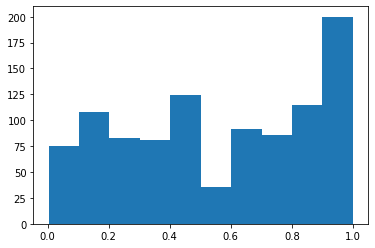

In [23]:
p_values = list()
for _ in range(1000):
    mock = get_sample(samples_10000, 500)
    s, p = ks_2samp(mock, samples_500['value'])
    
    p_values.append(p)

plt.hist(p_values)
print(np.mean(p_values))

### Conclusion

### Notes on other methods 

Since I want to learn more methods, I will write down what I am going to learn about other statistical tests like:   
**t-test** , **Shapiro–Wilk test** and the **Anderson–Darling test**.

### Explanation of p-value in hypothesis testing

A p-value is the probability of observing a certain result **or an even stronger** result against the null hypothesis, given that the null hypothesis is **true** ($H_{o}$).

\begin{equation*}
P(x \geq Result|H_{o}=True)
\end{equation*}  

The smallest the p-value, the greatest is the evidence against $H_{o}$.  

So, a **rough guidelines** to accept or reject the null-hypothesis are:
1. p-value < 0.01:
    - Very strong evidence against $H_{o}$.
2. 0.01 < p-value < 0.05.
    - Strong evidence against $H_{o}$.
3. 0.05 < p-value < 0.1.
    - Some weak evidence against $H_{o}$.
4. p-value > 0.1.
    - Little or no evidence against $H_{o}$, above p-value 0.2 we can't reject $H_{o}$.

**Example:**

Suppose your $H_{o}$ is that your population has a normal distribution with $\mu=0$ and $\sigma=5$, but your alternative hypothesis is $H_{a}$ is that the $\mu>0$. Plot the p-value distribution in the case where the null hypothesis is true and when the null hypothesis is false (ex: real normal distribution has a $\mu=1$.) Do you see any differences?


ref: https://www.youtube.com/watch?v=UsU-O2Z1rAs

In [75]:
# p-value distribution
# p-value: Ens diu quina és la probabilitat de que l'event que esteim estudiant 
#          hagui passat suposant que sa null hypothesis sigui vera (dibuix: )


def get_gaussian_samples(mean, std, size):
    return np.random.normal(mean, std, size)


def p_value_histogram(hypothesis_mean, real_mean, sigma=5, size=20, num_samples=10**5):
    p_values = list()
    
    sample_mean_list = list()
    z_list = list()
    for _ in range(num_samples):
        sample = get_gaussian_samples(real_mean, sigma, size)
        sample_mean=np.mean(sample)
        z = (sample_mean-hypothesis_mean)/(sigma/np.sqrt(size))
        
        # In this example H_a is mu>0, then we are interested in the area between (x, inf) and not (-inf, x)
        # (see above ref for more info)
        p_values.append(1-st.norm.cdf(z))
                
        sample_mean_list.append(sample_mean)
        z_list.append(z)
        
    plt.hist(p_values, bins=100)
    plt.show()

    print("P-value mean = ", np.mean(p_values))

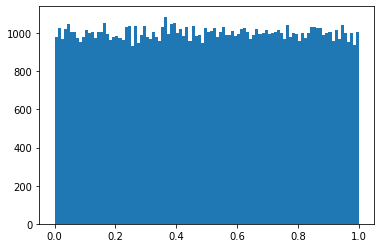

P-value mean =  0.4999182591713555


In [84]:
# null_hypothesis true:
hyp_mean, real_mean = 0, 0
p_value_histogram(hyp_mean, real_mean)

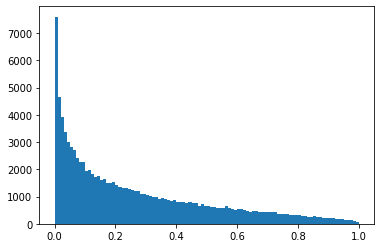

P-value mean =  0.2632184288116518


In [85]:
# null_hypothesis false:
hyp_mean, real_mean = 0, 1
p_value_histogram(hyp_mean, real_mean)

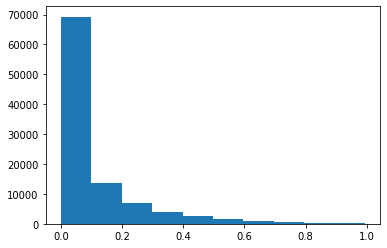

P-value mean =  0.10270430911474507


In [61]:
# null_hypothesis false:
hyp_mean, real_mean = 0, 2
p_value_histogram(hyp_mean, real_mean)

Although, I don't know why my average p-value is different from the youtube video (see ref). We clearly see that if the null hypothesis is true the p-value distribution will be uniform.  

On the other hand, if the null hypothesis is false, we see how the p-value distribution is shifted towards the left side. The more shifted towards the left, the lowest is the average p-value, and the greatest is the evidence against the null hypothesis.


**Why if the null hypothesis is true, we have a uniform p-value distribution?**  
There are several resources only to explain this claim, but I was not completly pleased with any of them. 
My way to approach this question was using the most simple example I could came up with. In the image below there is the full explanation. 

A short version will be: p-value distribution is related to the area under the curve, so at the tails of the normal distribution for most values the area is really similar. However, around the middle of the distribution the p-value (cumulative area) grows really quickly.




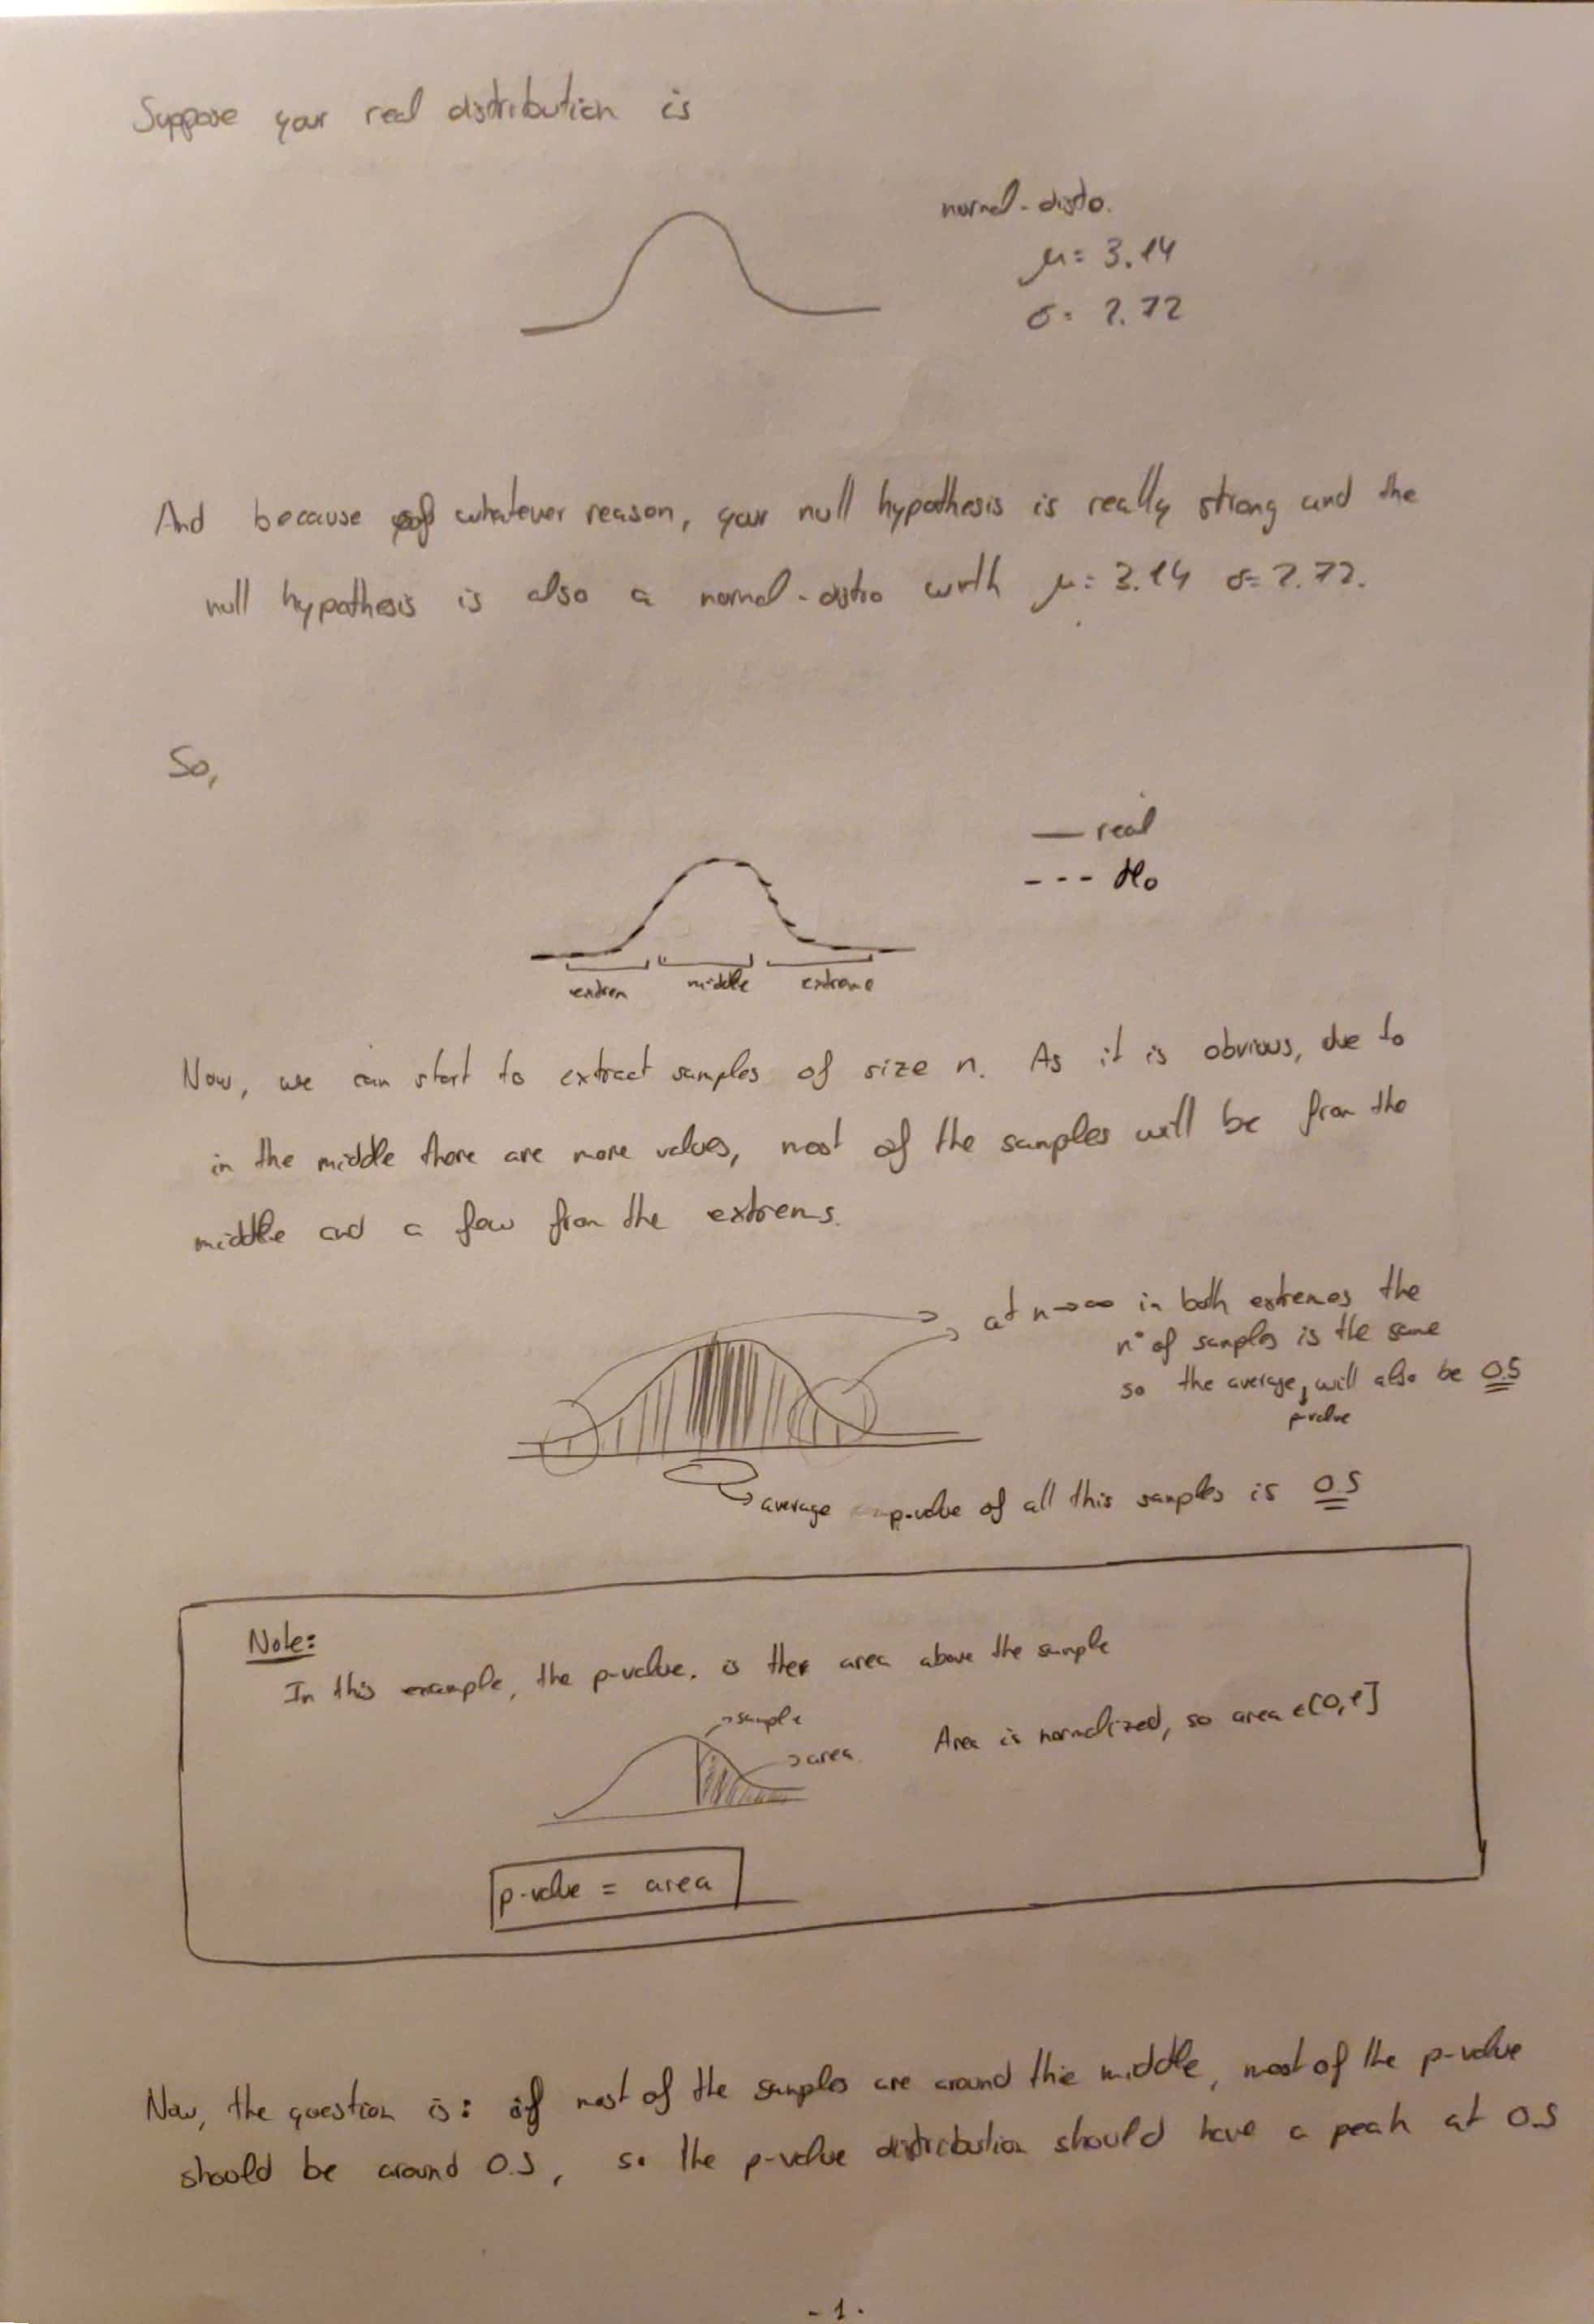

In [80]:
Image(filename='/media/gllodra12/extended_linux/Projectes/Proves_tecniques/TeamCMP_prova_tecnica/DataScientistAssignment/DataScientistAssignment/my_solutions/uniform_p_value_1.jpeg')

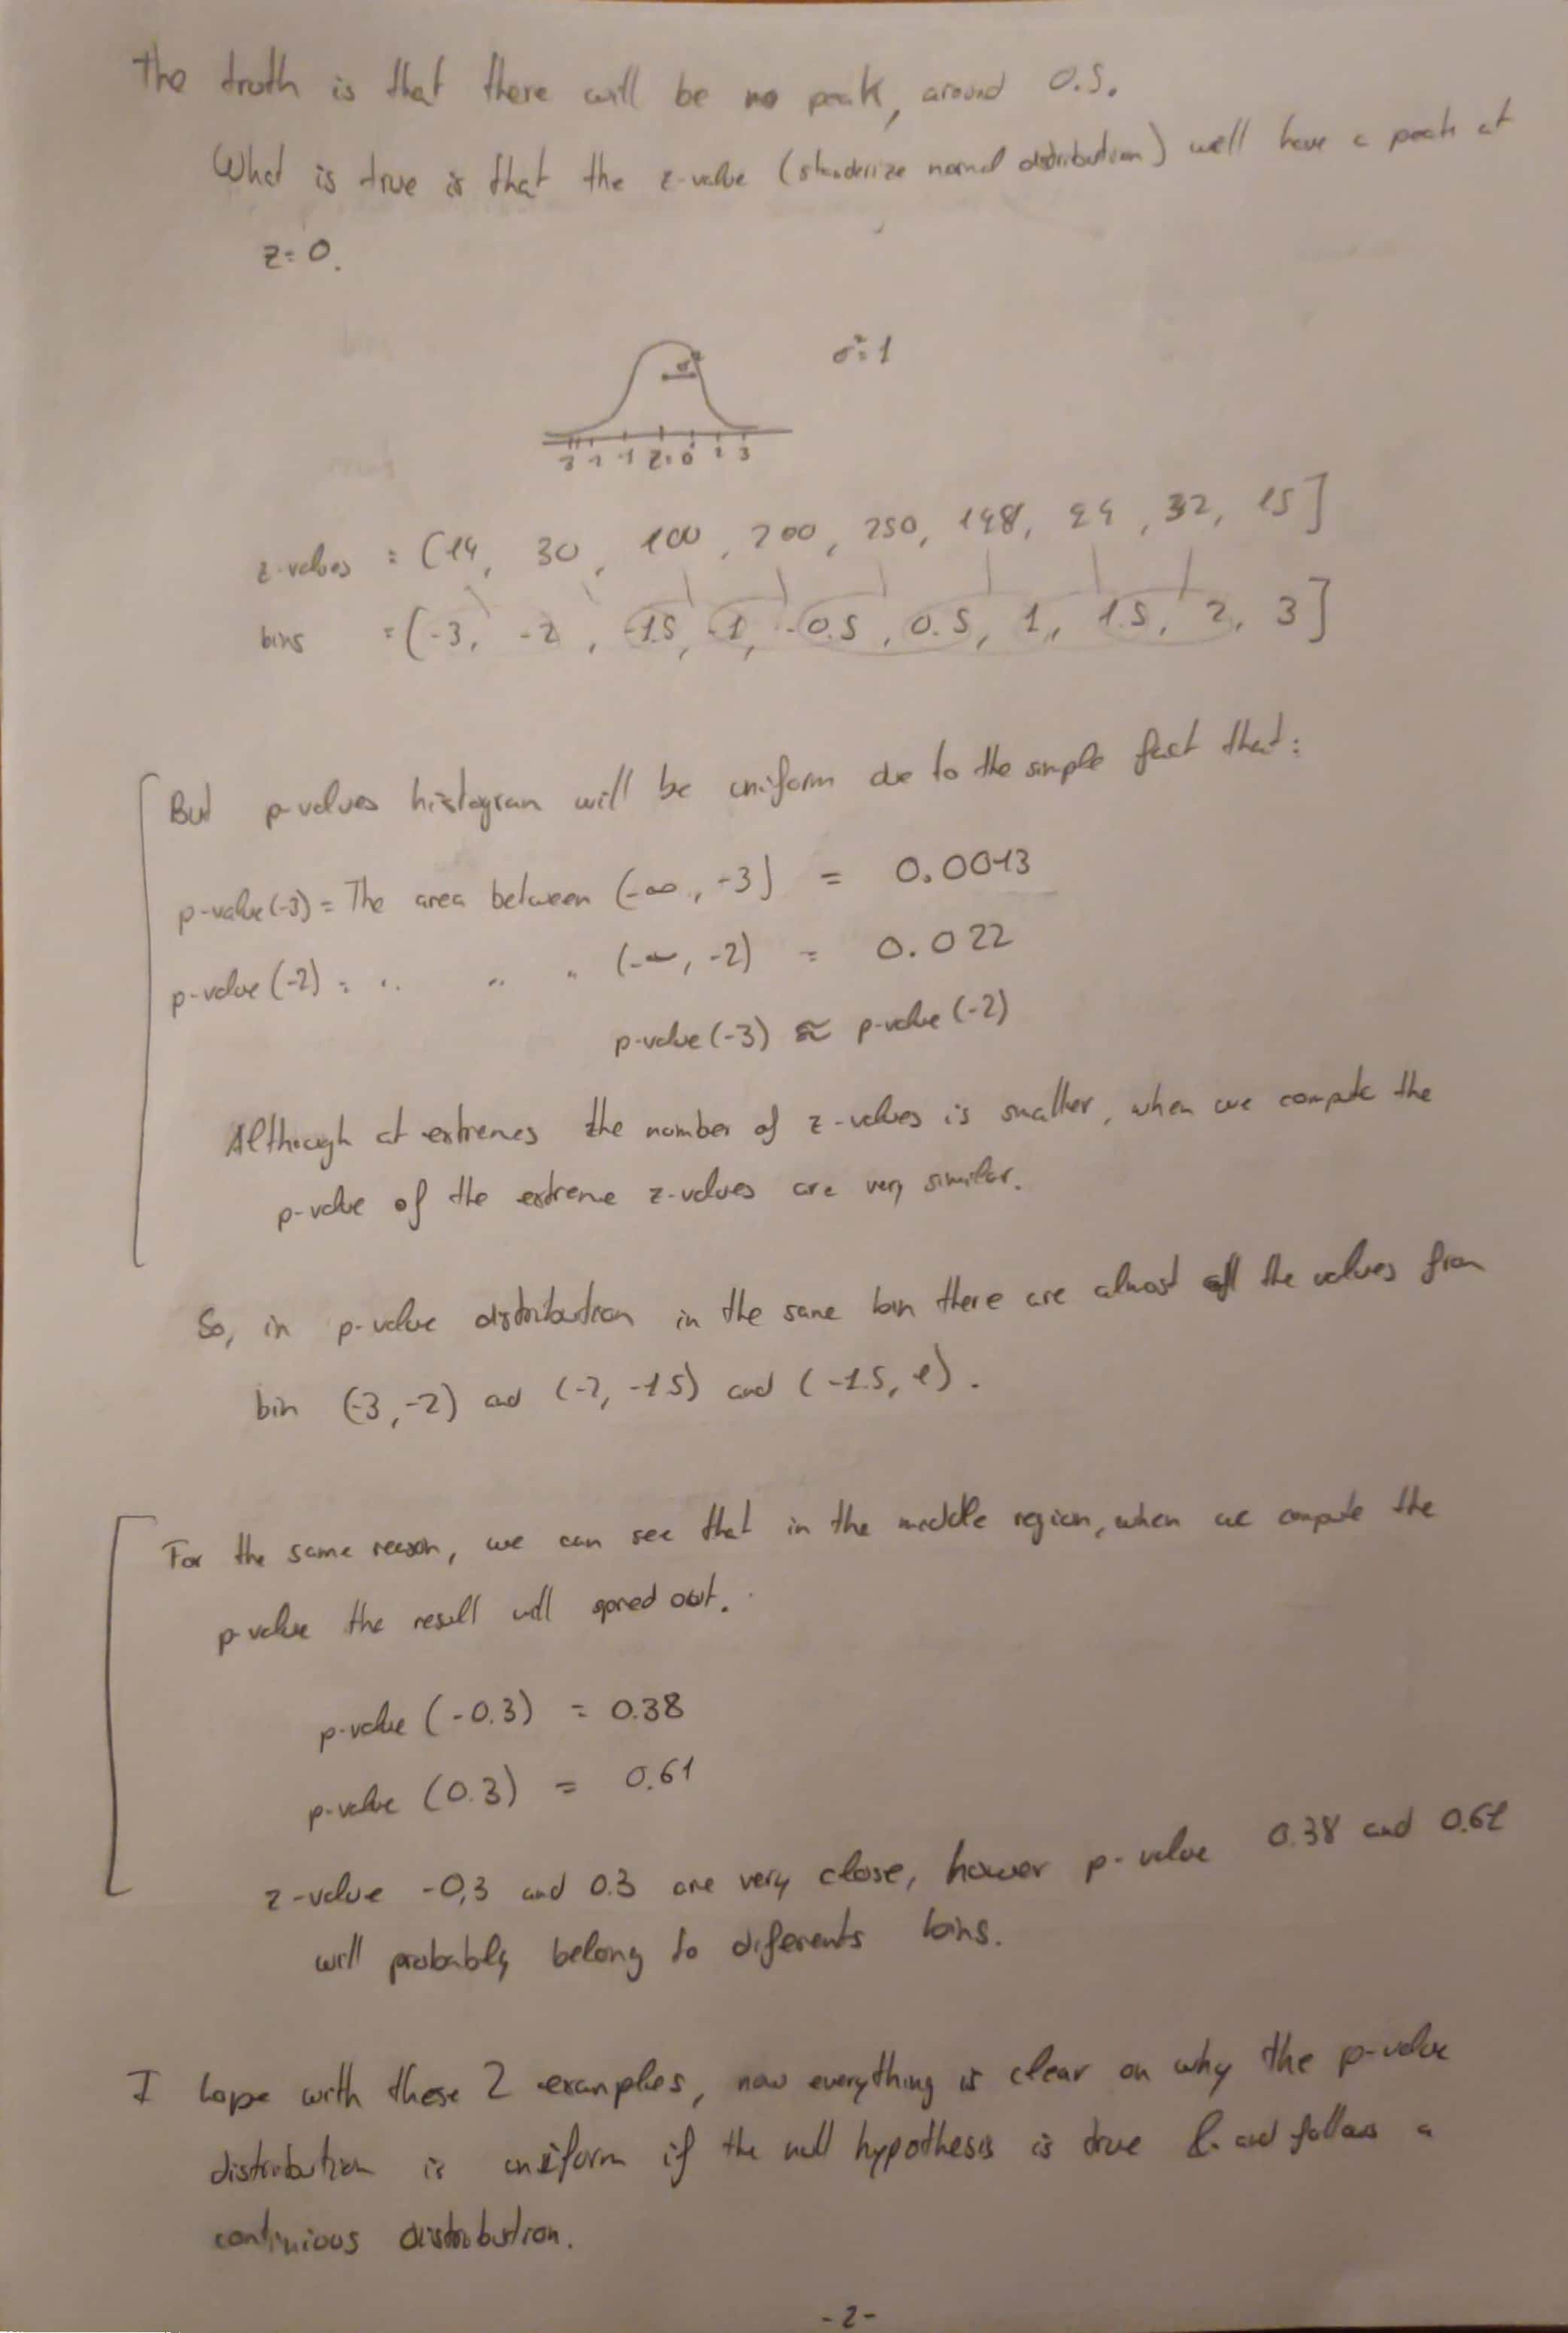

In [81]:
Image(filename='/media/gllodra12/extended_linux/Projectes/Proves_tecniques/TeamCMP_prova_tecnica/DataScientistAssignment/DataScientistAssignment/my_solutions/uniform_p_value_2.jpeg')